In [68]:
# import libary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(0)

In [69]:
# read data
def read_file_data(file_data_path):
    data = np.genfromtxt(file_data_path, delimiter=",", skip_header=1)

    X = data[:, :3]
    y_sales = data[:, 3]

    x_feature = np.c_[np.ones((len(y_sales), 1)), X]

    return x_feature, y_sales

DATA_PATH = "data/advertising.csv"
x_feature, _ = read_file_data(DATA_PATH)
print(x_feature[:5, :])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [70]:
_, y_sales = read_file_data(DATA_PATH)
print(y_sales[:5])
y_sales.shape

[22.1 10.4 12.  16.5 17.9]


(200,)

In [71]:
def random_in_range(bound=10):
    return (random.random()-0.5) * bound

In [72]:
def create_individual(n=4, bound=10):
    individual = [random_in_range() for _ in range(n)]
    return individual

individual = create_individual()
individual

[3.444218515250481, 2.5795440294030247, -0.79428419169155, -2.4108324970703663]

In [73]:
def compute_loss(individual):
    thetas = np.array(individual)
    y_hat = x_feature.dot(thetas)
    loss = np.multiply((y_hat - y_sales), (y_hat - y_sales).T).mean()
    return loss

def compute_fitness(individual):
    loss_individual = compute_loss(individual)
    fitness = 1/(loss_individual + 1)
    return fitness


x_feature, y_sales = read_file_data(DATA_PATH)
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)


1.0185991537088997e-06


In [74]:
def crossover(individual1, individual2, crossover_rate=0.09):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    for i in range(len(individual1)):
        if random.random() < crossover_rate:

            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]

    return individual1_new, individual2_new

individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)

print("Individual1: ", individual1)
print("Individual2: ", individual2)


Individual1:  [3.44, 2.57, -0.79, -2.41]
Individual2:  [4.09, 4.82, 3.1, 4.02]


In [75]:
def mutation(individual, mutation_rate=0.05):
    individual_m = individual.copy()

    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual_m[i] = random_in_range()
    return individual_m

before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutation(individual, mutation_rate = 2.0)
print(before_individual == after_individual)


False


In [76]:
def initialzie_population(m):
    population = [create_individual() for _ in range(m)]
    return population

In [77]:
def selection(sorted_old_population, m=100):
    index1 = random.randint(0, m-1)

    while True:
        index2 = random.randint(0, m-1)
        if index2 != index1:
            break
    
    individual_selected = sorted_old_population[index1]
    if index2 > index1:
        individual_selected = sorted_old_population[index2]

    return individual_selected


In [78]:
population = initialzie_population(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[-0.855820117227527, 1.5083286226334502, -4.984757781432798, -3.076904587553242]


In [79]:
random.seed(0)

In [80]:
def create_new_population(old_population, elitism=2, gen=1):

    m = len(old_population)

    sorted_old_population = sorted(old_population, key=compute_fitness)

    if gen % 1 == 0:
        print("Best loss: ", compute_loss(sorted_old_population[m-1]), 
                                          "with chromsome: ", sorted_old_population[m-1])
    
    new_population = []
    while len(new_population) < m-elitism:
        
        individual1 = selection(sorted_old_population, m)
        individual2 = selection(sorted_old_population, m)

        individual_t1, individual_t2 = crossover(individual1, individual2)

        individual_m1 = mutation(individual_t1)
        individual_m2 = mutation(individual_t2)

        new_population.append(individual_m1)
        new_population.append(individual_m2)

    for ind in sorted_old_population[m-elitism:]:
        new_population.append(ind.copy())

    return new_population, compute_fitness(sorted_old_population[m-1])

individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)


Best loss:  123415.05152880498 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [81]:
# def run_GA():
#     n_generate = 100
#     m = 600
#     x_feature, y_sales = read_file_data(DATA_PATH)
#     population = initialzie_population(m)
#     losses = []

#     for i in range(n_generate):
#         population, loss = create_new_population(population, 2, i)
        
#         losses.append(loss)

#     return losses

def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = read_file_data(DATA_PATH)
  population = initialzie_population(m)
  losses_list = []
  for i in range(n_generations):
    population, losses = create_new_population(population, 2, i)
    losses_list.append(losses)
  return losses_list, population



In [82]:
losses_list, population = run_GA()


Best loss:  499.42870543645824 with chromsome:  [3.331600837968306, -0.09720038244186435, 1.449875562942834, -0.2732124726990648]
Best loss:  499.42870543645824 with chromsome:  [3.331600837968306, -0.09720038244186435, 1.449875562942834, -0.2732124726990648]
Best loss:  499.42870543645824 with chromsome:  [3.331600837968306, -0.09720038244186435, 1.449875562942834, -0.2732124726990648]
Best loss:  221.59176833235463 with chromsome:  [-1.553016468871643, 0.03923197330006567, -0.5831993881428243, 0.597965879322987]
Best loss:  221.59176833235463 with chromsome:  [-1.553016468871643, 0.03923197330006567, -0.5831993881428243, 0.597965879322987]
Best loss:  187.69067053002232 with chromsome:  [-2.7538385235539034, -0.04369576611629622, 0.7544546780866013, 0.08978448260699934]
Best loss:  187.69067053002232 with chromsome:  [-2.7538385235539034, -0.04369576611629622, 0.7544546780866013, 0.08978448260699934]
Best loss:  114.77703896050285 with chromsome:  [-4.55647474600883, 0.02463423350588

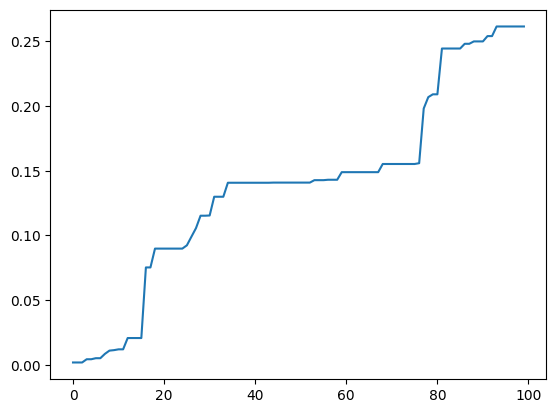

In [83]:
print
plt.plot(losses_list)
plt.show()